In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_dir = 'data/P00000001-ALL.csv'
dateparse = lambda x: pd.datetime.strptime(x, '%d-%b-%y')
contributions = pd.read_csv(data_dir, index_col=False, parse_dates=['contb_receipt_dt'], date_parser=dateparse)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (6,11,12,13,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
contributions['party'] = np.where(contributions['cand_nm'] == 'Trump, Donald J.','Republican', 'Democratic')

Text(0.5,1,'Contributions by Candidate')

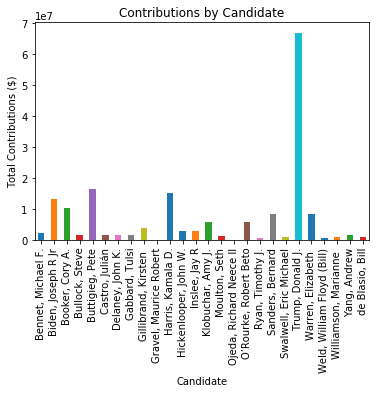

In [10]:
# No issues with candidate names
contributions.groupby('cand_nm')['contb_receipt_amt'].sum().plot.bar()
plt.xlabel("Candidate")
plt.ylabel("Total Contributions ($)")
plt.title("Contributions by Candidate")

In [16]:
# States seem fine except for ZZ (unknown) and exceptions (AP)?
contributions['contbr_st'].unique()

array(['AL', 'AP', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'IA',
       'ID', 'IL', 'IN', 'KS', 'KY', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO',
       'NC', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'ON', 'PA',
       'RI', 'SC', 'TN', 'TX', 'UT', 'VA', 'WA', 'WI', 'WV', 'AA', 'AE',
       'AK', 'AR', 'AS', 'GU', 'HI', 'LA', 'MP', 'MS', 'MT', 'ND', 'OR',
       'PR', 'SD', 'VI', 'VT', 'WY', 'ZZ', 'AB', 'BC', 'EN', 'HO', 'NS',
       'OF', 'QC', 'BE', 'FR', 'KR', 'UK', 'BR', 'LO'], dtype=object)

In [18]:
np.where

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp,party
846936,C00659938,P00006486,"Yang, Andrew","WEBER, GRADY",MONTREAL,QC,H4G 1,HOPPER INC.,SOFTWARE DEVELOPER,100.0,2018-09-30,NaN,NaN,NaN,SA17A,1273256,AE1F8E72DF73C4167BC7,P2020,Democrat
846937,C00659938,P00006486,"Yang, Andrew","AFFANE, CHOUKRI",CANDIAC,QC,J5R1A,BELL MOBILITY,STUDENT/SALES REPRESENTATIVE,1.0,2018-07-01,NaN,NaN,NaN,SA17A,1273256,A9B2090916DBB491B996,P2020,Democrat


In [19]:
 us_states = ['AL', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'IA',
                 'ID', 'IL', 'IN', 'KS', 'KY', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO',
                 'NC', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'PA',
                 'RI', 'SC', 'TN', 'TX', 'UT', 'VA', 'WA', 'WI', 'WV',
                 'AK', 'AR', 'HI', 'LA', 'MS', 'MT', 'ND', 'OR',
                 'SD', 'VT', 'WY']

contributions['in_50_states'] = np.where(contributions['contbr_st'].isin(us_states), 1, 0)

In [31]:
pd.set_option('display.max_rows', 500)
contributions.groupby('contbr_employer')['cand_nm'].count().sort_values(ascending=False)

contbr_employer
RETIRED                                   386589
NONE                                      143155
SELF-EMPLOYED                             141599
NOT EMPLOYED                               70888
ENTREPRENEUR                               10998
HOMEMAKER                                   4960
GOOGLE                                      1567
USPS                                        1287
STUDENT                                     1160
DOD                                         1008
AMERICAN AIRLINES                            982
WALMART                                      939
BOEING                                       932
MICROSOFT                                    878
CAREGIVER                                    845
ROLLING HILLS CAMPUS                         835
APPLE                                        833
AT&T                                         817
US ARMY                                      808
UNITED AIRLINES                              785
IBM 

In [28]:
    corrections = {'SELF EMPLOYED':'SELF-EMPLOYED',
                   'SELF':'SELF-EMPLOYED',
                   'INFORMATION REQUESTED':'NONE',
                   'INFORMATION REQUESTED PER BEST EFFORTS': 'NONE',
                   'NOT-EMPLOYED': 'NOT EMPLOYED',
                   'UNEMPLOYED': 'NOT EMPLOYED',
                   'INDEPENDENT CONTRACTOR': 'SELF-EMPLOYED',
                   'OWNER': 'SELF-EMPLOYED',
                   'DEPT OF DEFENSE': 'DOD',
                   'GOOGLE INC.': 'GOOGLE'}
    remove = [',',
              '.',
              ' INC',
              ' LLC',
              ' CORP']
    # May want to combine various DOD / Army forces together
    # Could also combined entrepreneurs and similar with self-employed
    contributions['contbr_employer'] = contributions['contbr_employer'].replace(corrections)

In [30]:
    for val in remove:
        contributions['contbr_employer'] = contributions.contbr_employer.str.replace(val, '')


In [33]:
contributions.groupby('contbr_occupation')['cand_nm'].count().sort_values(ascending=False)

contbr_occupation
RETIRED                                   401525
NOT EMPLOYED                              147178
INFORMATION REQUESTED                      58576
ATTORNEY                                   27556
PHYSICIAN                                  21437
ENGINEER                                   14388
SALES                                      13410
ENTREPRENEUR                               12142
TEACHER                                    11998
SELF-EMPLOYED                              11354
CONSULTANT                                 11199
OWNER                                      11119
MANAGER                                    10289
CEO                                         9665
SOFTWARE ENGINEER                           8563
PROFESSOR                                   7923
BUSINESS OWNER                              7603
PRESIDENT                                   7234
HOMEMAKER                                   6506
LAWYER                                      5837
RE

In [35]:
contributions[contributions.contb_receipt_amt < 0]

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp,party,in_50_states
15,C00508416,P00006213,"Delaney, John K.","BAUCH, THOMAS",BELVEDERE,CA,949202504,SELF-EMPLOYED,METAPHYSICIAN,-150.00,2017-12-07,NaN,NaN,INSUFFICIENT FUNDS,SA17A,1240948,VTQXVBYDA38,P2020,Democrat,1
19,C00508416,P00006213,"Delaney, John K.","FISHER, JOHN J.",SAN FRANCISCO,CA,941112033,NaN,NaN,-2700.00,2017-08-31,Refund,NaN,NaN,SB28A,1240945,VTPYK9JH7N5,G2018,Democrat,1
106,C00508416,P00006213,"Delaney, John K.","WILLIAMS, FRANK",BERKELEY,CA,947051415,NaN,NaN,-2800.00,2019-03-15,Refund,NaN,NaN,SB28A,1324749,500008855,P2020,Democrat,1
107,C00508416,P00006213,"Delaney, John K.","THACHER, JOHN",SAINT HELENA,CA,945741761,NaN,NaN,-2700.00,2019-03-31,Refund,NaN,NaN,SB28A,1324749,500009257,P2020,Democrat,1
109,C00508416,P00006213,"Delaney, John K.","FLYNN, GREG",SAN FRANCISCO,CA,941044211,NaN,NaN,-1000.00,2019-03-31,Refund,NaN,NaN,SB28A,1324749,500009256,P2020,Democrat,1
113,C00508416,P00006213,"Delaney, John K.","MIHALKE, MICHAEL",SANTA MONICA,CA,904031847,NaN,NaN,-2700.00,2019-02-14,Refund,NaN,NaN,SB28A,1324749,500008446,P2020,Democrat,1
122,C00508416,P00006213,"Delaney, John K.","THACHER, JOHN",SAINT HELENA,CA,945741761,NaN,NaN,-1000.00,2019-03-25,Refund,NaN,NaN,SB28A,1324749,500009093,P2020,Democrat,1
147,C00508416,P00006213,"Delaney, John K.","HOLMSTROM, RICK",WOODSIDE,CA,940622411,NaN,NaN,-200.00,2019-06-20,Refund,NaN,NaN,SB28A,1340229,500010896,P2020,Democrat,1
241,C00508416,P00006213,"Delaney, John K.","QUAMME, ASHLEY",WASHINGTON,DC,200165343,NaN,NaN,-1000.00,2019-04-29,Refund,NaN,NaN,SB28A,1340229,500009686,P2020,Democrat,1
242,C00508416,P00006213,"Delaney, John K.","QUAMME, STEVEN",WASHINGTON,DC,200062414,NaN,NaN,-2800.00,2019-04-29,Refund,NaN,NaN,SB28A,1340229,500009687,P2020,Democrat,1


In [43]:
name = 'THACHER, JOHN' #'BAUCH, THOMAS' # THACHER, JOHN Has no indicator outside of the refund amount
contributions[contributions.contbr_nm == name]

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp,party,in_50_states
45,C00508416,P00006213,"Delaney, John K.","THACHER, JOHN",SAINT HELENA,CA,945741761,WILBUR-ELLIS,DISTRIBUTON,2700.0,2018-01-03,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1240965,VTQXVCK95H2,P2020,Democrat,1
103,C00508416,P00006213,"Delaney, John K.","THACHER, JOHN",SAINT HELENA,CA,945741761,WILBUR-ELLIS,DISTRIBUTRION,1000.0,2019-03-12,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1324749,597063,P2020,Democrat,1
107,C00508416,P00006213,"Delaney, John K.","THACHER, JOHN",SAINT HELENA,CA,945741761,NaN,NaN,-2700.0,2019-03-31,Refund,NaN,NaN,SB28A,1324749,500009257,P2020,Democrat,1
122,C00508416,P00006213,"Delaney, John K.","THACHER, JOHN",SAINT HELENA,CA,945741761,NaN,NaN,-1000.0,2019-03-25,Refund,NaN,NaN,SB28A,1324749,500009093,P2020,Democrat,1
123,C00508416,P00006213,"Delaney, John K.","THACHER, JOHN",SAINT HELENA,CA,945741761,WILBUR-ELLIS,DISTRIBUTRION,2800.0,2019-03-31,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1324749,600199,P2020,Democrat,1


In [40]:
contributions.groupby('memo_text')['cand_nm'].count().sort_values(ascending=False)

memo_text
* EARMARKED CONTRIBUTION: SEE BELOW                                                                    405323
* EARMARKED CONTRIBUTION THROUGH ACTBLUE ON 06/30/2019                                                    709
NOTE: ABOVE CONTRIBUTION EARMARKED THROUGH THIS ORGANIZATION.                                             342
* EARMARKED CONTRIBUTION THROUGH ACTBLUE ON 06/27/2019                                                    324
* EARMARKED CONTRIBUTION THROUGH ACTBLUE ON 03/31/2019                                                    273
TRANSFER FROM 2020 CONGRESSIONAL                                                                          256
* EARMARKED CONTRIBUTION THROUGH ACTBLUE ON 05/19/2019                                                    239
* EARMARKED CONTRIBUTION: SEE BELOW US CITIZEN                                                            231
* EARMARKED CONTRIBUTION THROUGH ACTBLUE ON 04/14/2019                                                    198


In [45]:
contributions[contributions.contb_receipt_amt < 0]['contb_receipt_amt'].sum()

-10687677.08

In [46]:
contributions['contb_receipt_amt'].sum()

174598491.51999998

In [3]:
from preprocessing import load_dataset

In [4]:
df_tmp = load_dataset()

In [7]:
df_tmp.sort_values('contb_receipt_amt', ascending=False)

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,...,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp,party,in_50_states,contbr_id
379980,C00580100,P80001571,"Trump, Donald J.",TRUMP MAKE AMERICA GREAT AGAIN COMMITTEE - UNI...,BEVERLY,MA,01915,NaN,NaN,2721782.08,...,NaN,X,NaN,SA18,1219890,SA18.1179357,P2020,Republican,1,TRUMP MAKE AMERICA GREAT AGAIN COMMITTEE - UNI...
380870,C00580100,P80001571,"Trump, Donald J.",TRUMP MAKE AMERICA GREAT AGAIN COMMITTEE - UNI...,BEVERLY,MA,01915,NaN,NaN,2561763.11,...,NaN,X,NaN,SA18,1248053,SA18.15581,P2020,Republican,1,TRUMP MAKE AMERICA GREAT AGAIN COMMITTEE - UNI...
383773,C00580100,P80001571,"Trump, Donald J.",TRUMP MAKE AMERICA GREAT AGAIN COMMITTEE - UNI...,BEVERLY,MA,01915,NaN,NaN,1158174.79,...,NaN,X,NaN,SA18,1248053,SA18.15582,P2020,Republican,1,TRUMP MAKE AMERICA GREAT AGAIN COMMITTEE - UNI...
965405,C00694455,P00009423,"Harris, Kamala D.",KAMALA HARRIS FOR SENATE - UNITEMIZED,LOS ANGELES,CA,900175864,NaN,NaN,1016308.67,...,NaN,X,* TRANSFER OF SENATE CAMPAIGN FUNDS.,SA18,1326016,1554548J,P2020,Democratic,1,KAMALA HARRIS FOR SENATE - UNITEMIZED_900175864
1011311,C00695510,P00009795,"Booker, Cory A.",CORY BOOKER FOR SENATE - UNITEMIZED,WASHINGTON,DC,200030293,NaN,NaN,712803.31,...,NaN,X,NaN,SA18,1326465,999768J,P2020,Democratic,1,CORY BOOKER FOR SENATE - UNITEMIZED_200030293
382333,C00580100,P80001571,"Trump, Donald J.",TRUMP MAKE AMERICA GREAT AGAIN COMMITTEE - UNI...,BEVERLY,MA,01915,NaN,NaN,271807.73,...,NaN,X,NaN,SA18,1219890,SA18.1179359,P2020,Republican,1,TRUMP MAKE AMERICA GREAT AGAIN COMMITTEE - UNI...
1011274,C00695510,P00009795,"Booker, Cory A.",CORY BOOKER FOR SENATE - UNITEMIZED,WASHINGTON,DC,200030293,NaN,NaN,153169.32,...,NaN,X,NaN,SA18,1326465,1003894J,P2020,Democratic,1,CORY BOOKER FOR SENATE - UNITEMIZED_200030293
938840,C00693713,P00009183,"Gabbard, Tulsi",TULSI FOR HAWAI'I,KAPOLEI,HI,967070561,NaN,NaN,132078.00,...,NaN,X,* LIST PURCHASE,SA18,1326558,982744,P2020,Democratic,1,TULSI FOR HAWAI'I_967070561
895750,C00693234,P00009621,"Warren, Elizabeth","ELIZABETH FOR MA, INC.",BOSTON,MA,021290210,NaN,NaN,105000.00,...,NaN,X,* IN-KIND TRANSFER OF CAMPAIGN ASSETS,SA18,1326299,2816314,P2020,Democratic,1,"ELIZABETH FOR MA, INC._021290210"
1011330,C00695510,P00009795,"Booker, Cory A.",CORY BOOKER FOR SENATE - UNITEMIZED,WASHINGTON,DC,200030293,NaN,NaN,35459.41,...,NaN,X,NaN,SA18,1326465,1078131J,P2020,Democratic,1,CORY BOOKER FOR SENATE - UNITEMIZED_200030293


In [9]:
df_tmp['election_tp'].unique()

array(['P2020', 'G2018', 'O2018', 'P2018', nan, 'G2020', 'G2016', 'P2016'],
      dtype=object)

In [6]:
df_tmp.groupby('contbr_employer')['cand_nm'].count().sort_values(ascending=False)

contbr_employer
RETIRED                                   386589
NONE                                      143155
SELF-EMPLOYED                             141599
NOT EMPLOYED                               70888
ENTREPRENEUR                               10998
HOMEMAKER                                   4960
GOOGLE                                      1581
USPS                                        1321
STUDENT                                     1160
DOD                                         1035
AMERICAN AIRLINES                            982
WALMART                                      944
US ARMY                                      934
BOEING                                       932
MICROSOFT                                    886
APPLE                                        866
CAREGIVER                                    845
ROLLING HILLS CAMPUS                         835
AT&T                                         817
UNITED AIRLINES                              785
IBM 

In [91]:
## Creating a network
import networkx as nx 
# 1) All links
G=nx.Graph()

# Add contributors
nodes = df['contbr_id'].unique()[:1000]
G.add_nodes_from(nodes)

# Add candidates
candidates = df['cand_nm'].unique()
candidates = np.delete(candidates, np.where(candidates == ['Trump, Donald J.']), axis=0)
G.add_nodes_from(candidates)

#Add edges
for index, row in df[:10000].iterrows():
    contbr_id = row['contbr_id']
    cand_nm = row['cand_nm']
    amount = row['contb_receipt_amt']
    if row['contbr_id'] in nodes and cand_nm in candidates:        
        if G.has_edge(contbr_id, cand_nm):
            G[contbr_id][cand_nm]['weight'] += amount
            
        else:
            G.add_edge(contbr_id, cand_nm, weight=amount)


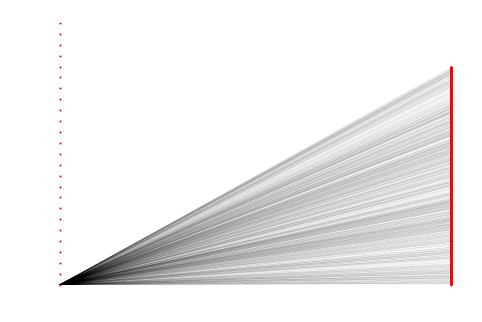

In [98]:
max_donation = max(G[u][v]['weight'] for u,v in G.edges)
weights = [0.1*round(G[u][v]['weight']/max_donation, 1) for u,v in G.edges]
pos = dict()
pos.update( (n, (1, 100*i)) for i, n in enumerate(candidates) ) # put nodes from X at x=1
pos.update( (n, (2, 2*i)) for i, n in enumerate(nodes) ) # put nodes from Y at x=2

nx.draw(G, edges=G.edges, width=weights, pos=pos, node_size=1)

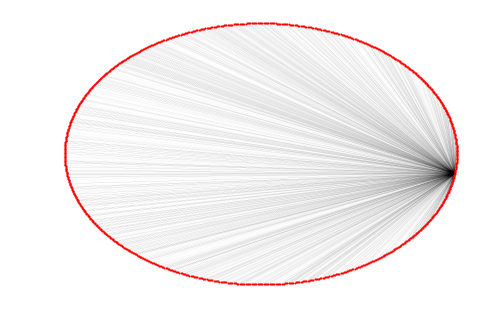

In [101]:
nx.draw_circular(G, edges=G.edges, width=weights, node_size=1)

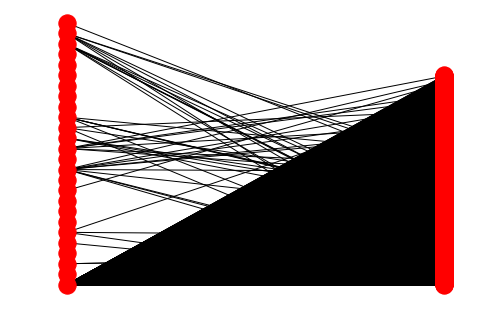

In [59]:
pos = dict()
pos.update( (n, (1, 100*i)) for i, n in enumerate(candidates) ) # put nodes from X at x=1
pos.update( (n, (2, 2*i)) for i, n in enumerate(nodes) ) # put nodes from Y at x=2
nx.draw(G, pos=pos)

In [33]:
df_tmp['contbr_id'] = df_tmp['contbr_nm'].map(str) + '_' + df_tmp['contbr_zip'].map(str)